In [9]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFunctions import *
from PossiblePaths import *
from BackgroundValues import *
from random import uniform
import random
import matplotlib
import pickle
import math 
import time #to save figs automatically time.strftime("%Y_%m_%d_%s")
#%matplotlib auto

In [10]:
def MakeGaussianwide(Ray,Lamd):
    mux,muy = Ray[2][0],Ray[2][1] #center of gaussian is intersection point
    width = 4.5*Lamd
    sig = width/3
    return sig,mux,muy

def RunOneRay(Lamd,Nsize,spo): 
    n = 1
    r = 0
    Rays = makeraysVERTICAL(spo,r,n) 
    jx,jy = gridlines(7.9375,[160.375,-113],200) #these are now the PIXELS
    Pix = MakePixels(jx,jy) #center of each pixel
    Ij = []
    Delay = []
    for y in np.linspace(-18,18,int(Nsize)):
        PTot=0
        OutRays=RunRaysM(Rays,y) #eight each
        #Overlap = gaussoverlap(OutRays[0],OutRays[5],3.3) #two paths that hit two different spots 
        for j in range(len(Pix)): #per PIXEL
            Ex4i = 0 #adding PER PIXEL from parts of RAYS in this PIXEL
            Ey4i = 0 #THIS IS WHERE THEY WILL INTERFERE
            for i in range(len(OutRays)): #per ray IN THIS PIXEL
                I = OutRays[i][1]
                thet = OutRays[i][0]
                phase = np.exp(1j*(OutRays[i][4]*2*np.pi/Lamd)) #factor of 2??
                Ex1 = np.sqrt(I)*np.cos(thet)
                Ey1 = np.sqrt(I)*np.sin(thet)
                Ex = Ex1*phase
                Ey = Ey1*phase
                #doing summation over entire detector
                sig,mux,muy = MakeGaussianwide(OutRays[i],Lamd)
                Gr = Airygaussian3dNORM(Pix[j][0],Pix[j][1],sig,mux,muy)
                Ex4i = Ex4i + Gr*Ex
                Ey4i = Ey4i + Gr*Ey
            PTot = PTot + (Ex4i*Ex4i.conjugate()).real + (Ey4i*Ey4i.conjugate()).real
        Delay.append(y*0.95630475596*4)
        Ij.append(PTot)
    return Delay,Ij

In [12]:
Timei = time.time()
Lamd = 1.016
Nsize = Nsized(Lamd)
#Nsize = 8192
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
spo1 = [-152.4375, -113.0,-80.]
#XY = [spo1[0],spo1[1]]
#print(XY)
    
Delay,Ij = RunOneRay(Lamd,Nsize,spo)
with open("Plots/WideGaussI"+str(Lamd)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as f:
    pickle.dump(Ij,f)
with open("Plots/WideGaussD"+str(Lamd)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as f:
    pickle.dump(Delay,f)
Timef = time.time()
print('total time: ~',float(Timef-Timei)/60, 'mins')

total time: ~ 2.4088462829589843 mins


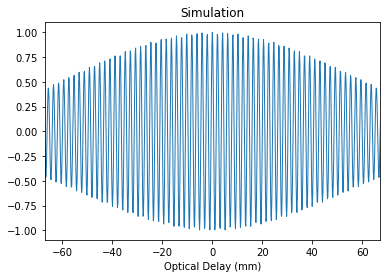

In [11]:
Power1 = np.array(Ij)
a = Power1.max()
b = a/2
Power = [(x-b)/(a/2) for x in Power1]
pl.plot(Delay,Power,linewidth = 1) 
pl.xlim(-67,67)
pl.title('Simulation')
pl.xlabel('Optical Delay (mm)')
pl.savefig('Plots/wideAiry'+time.strftime("_%Y_%m_%d_%H_%M_%S")+'.png')

pl.show()